## Impulse response testing

We define a simple second order system under the influece of a unit impulse input.

\begin{align}
    \ddot{x} + 4 \dot{x} + 3 x = \delta(t)
\end{align}

with the initial conditions

\begin{align}
    x(0) = 2 \quad \dot{x}(0) = 1
\end{align}

Taking the Laplace transform and expanding gives

\begin{align}
    X(s) = \frac{10+2s}{(s+3)(s+1)} = \frac{-2}{s+3} + \frac{4}{s+1}
\end{align}

This can be inverted to find the time response as

\begin{align}
    x(t) &= -2\exp(-3t) + 4 \exp(-t), \\
    \dot{x}(t) &= 6 \exp(-3t) -4 \exp(-t)
\end{align}

Equivalently, we can define the system in state space form as

\begin{align}
    \begin{bmatrix}
        \dot{x}_1 \\ \dot{x}_2
    \end{bmatrix} = 
    \begin{bmatrix}
        0 & 1 \\-3 &-4
    \end{bmatrix}
    \begin{bmatrix}
        x_1 \\ x_2
    \end{bmatrix}
    +
    \begin{bmatrix}
        0 \\ 1
    \end{bmatrix}
    u (t)
\end{align}

In [26]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pylab as plt

# transfer function
num = 1
den = [1, 4, 3]

x0 = 2
xd0 = 1

time = np.linspace(0,10,100)

A = np.array([[0, 1],[-3, -4]])
B = np.array([[0],[1]])
C = np.array([1, 0])
D = np.array([0])

systf = signal.TransferFunction(num,den)

def analytical(t):
    x = -2 *np.exp(-3*t) + 4 * np.exp(-t)
    xd = 6*np.exp(-3*t) -4 * np.exp(-t)
    return x

Now we simulate and compare

## `impulse` function 

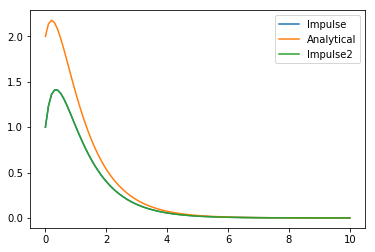

In [27]:
# _, tf_im = signal.impulse(systf, X0=(x0, xd0), T=time) # doesn't work
# _, tf_im = signal.impulse(systf, X0=np.array([x0, xd0]), T=time) # doesn't work
_, tf_im = signal.impulse(systf, X0=np.array([[x0],[xd0]]), T=time) 

_, tf_im2 = signal.impulse2(systf, X0=(x0, xd0), T=time) 
# _, tf_im2 = signal.impulse2(systf, X0=np.array([x0, xd0]), T=time) 
# _, tf_im2 = signal.impulse2(systf, X0=np.array([[x0],[xd0]]), T=time) # doesn't work

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, tf_im, label='Impulse')
ax.plot(time, analytical(time), label='Analytical')
ax.plot(time, tf_im2, label='Impulse2')
ax.legend()

## Comparing order of initial conditions

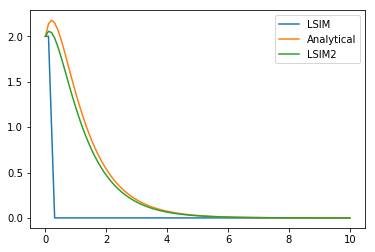

In [28]:
u = np.zeros_like(time)
_, ss_lsim, state = signal.lsim((A,B,C,D), u, T=time, X0=(x0, xd0))
_, ss_lsim2, state = signal.lsim2((A,B,C,D), u, T=time, X0=(x0, xd0))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, ss_lsim, label='LSIM')
ax.plot(time, analytical(time), label='Analytical')
ax.plot(time,ss_lsim2, label='LSIM2')
ax.legend()

## Observations

* The order of the initial conditions is reversed between `impulse/impulse2` and `lsim/lsim2`. 
* There's a difference in the response of `lsim` and `lsim2`
* Both `lsim` and `lsim2` don't match the analytical response
* The format of the initial condition is different between `impulse` and `impulse2`